
# coding: utf-8
import open3d as o3d
import numpy as np

world = [[0.0, 0.0, 0.0], [0.0, 0.05, 0.0], [0.0, 0.1, 0.0], [0.05, 0.0, 0.0], [0.05, 0.05, 0.0], [0.05, 0.1, 0.0], [0.1, 0.0, 0.0], [0.1, 0.05, 0.0], [0.1, 0.1, 0.0], [0.0, 0.0, 0.05], [0.0, 0.05, 0.05], [0.0, 0.1, 0.05], [0.05, 0.0, 0.05], [0.05, 0.05, 0.05], [0.05, 0.1, 0.05], [0.1, 0.0, 0.05], [0.1, 0.05, 0.05], [0.1, 0.1, 0.05]]

xyz = np.array(world)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
o3d.io.write_point_cloud("test.ply", pcd)
#https://jp.mathworks.com/help/vision/ref/pcread.html
#https://jp.mathworks.com/matlabcentral/fileexchange/83173-classify-point-clouds-using-pointnet?s_tid=FX_rc1_behav

In [5]:
import open3d as o3d
import numpy as np
import glob
human = "takuya"
mozi = 300
file = glob.glob('./yoko/'+human+'/'+str(mozi) + 'cm/txt/*.txt')
print(len(file))
xxx= []
for idx in range(1,len(file)):
    f = open(file[idx],'r')
    data = f.read()
    f.close()
    datas_enter = data.split('\n')
    x = []
    xxx = []
    for data_enter in datas_enter:
        if not data_enter == '':
            data_enter_split = data_enter.split(' ')
            x.append(data_enter_split[0])
            x.append(data_enter_split[1])
            x.append(data_enter_split[2])
            xxx.append(x)
            x = []
        break
print(xxx)
    #xyz = np.array(xxx)
    #pcd = o3d.geometry.PointCloud()
    #pcd.points = o3d.utility.Vector3dVector(xyz)
    
    #file_path = './yoko/'+human + '/'+str(mozi) + 'cm/takuya_human/'
    #o3d.io.write_point_cloud(file_path + 'train_'+str(idx)+'.ply',pcd)


0
[]


In [4]:
import glob
files = glob.glob('./*.txt')
files

['.\\box.txt', '.\\human_4m.txt']

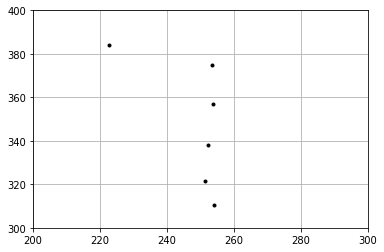

In [14]:
import math
import glob as gb
import matplotlib.pyplot as plt

def split_list(l, n):
    for idx in range(0, len(l)-1, n):
        yield l[idx:idx + n]


#path = './syoumen/takuya/150cm/'
#files = gb.glob(path + 'leg.txt')
files = gb.glob('C:/Users/wtana/Desktop/LiDAR_cm/lidar_txt_files/wall_2.txt')
f = open(files[0],'r')
data_enter = f.read().split('\n')
f.close()
delete_kakko = data_enter[9].replace('(','').replace(')',',').replace('[','').replace(']','')
split_kanma = delete_kakko.split(',')
angle = []
distance = []
result = list(split_list(split_kanma,3))
for i in range(len(result)):
    angle.append(float(result[i][1])-38)
    distance.append(float(result[i][2]))

an90 = [] #x
me90 = [] #y
an180 = []
me180 = []
an270 = []
me270 = []
an0 = []
me0 = []
for i in range(len(angle)):
    x = distance[i] * math.cos(math.radians(angle[i])) 
    y = math.sqrt(distance[i] ** 2 - x ** 2) 
    x = x / 10
    y = y / 10
    if(0 <= float(angle[i]) and float(angle[i]) <= 90):
        an90.append(x)
        me90.append(-y)
    elif(90 < float(angle[i]) and float(angle[i]) <= 180):
        an180.append(x)
        me180.append(-y)
    elif(180 < float(angle[i]) and float(angle[i]) <= 270):
        an270.append(x)
        me270.append(y)
    else:
        an0.append(x)
        me0.append(y)
fig = plt.figure()
plt.plot(an0,me0,linestyle='',marker=".",c='black')
plt.plot(an90,me90,linestyle='',marker=".",c='black')
plt.plot(an180,me180,linestyle='',marker=".",c='pink')
plt.plot(an270,me270,linestyle='',marker=".",c='red')
xmi = 200
xma = 300
ymi = 300
yma = 400
plt.plot(0,0,linestyle='',marker='*')
plt.xlim(xmi,xma)
plt.ylim(ymi,yma)
plt.grid('TRUE')
#fig.savefig('C:/Users/wtana/Desktop/大学院関係/学会/FIT/plot.png')

In [23]:
hight = 95
for idx in range(1,len(data_enter)-1):
    delete_kakko = data_enter[idx].replace('(','').replace(')',',').replace('[','').replace(']','')
    split_kanma = delete_kakko.split(',')
    angle = []
    distance = []
    result = list(split_list(split_kanma,3))
    for i in range(len(result)):
        angle.append(float(result[i][1]))
        distance.append(float(result[i][2]))
    an90 = [] #x
    me90 = [] #y
    an180 = []
    me180 = []
    an270 = []
    me270 = []
    an0 = []
    me0 = []
    for i in range(len(angle)):
        x = distance[i] * math.cos(math.radians(angle[i])) 
        y = math.sqrt(distance[i] ** 2 - x ** 2) 
        x = x / 10
        y = y / 10
        if(0 <= float(angle[i]) and float(angle[i]) <= 90):
            an90.append(x)
            me90.append(-y)
        elif(90 < float(angle[i]) and float(angle[i]) <= 180):
            an180.append(x)
            me180.append(-y)
        elif(180 < float(angle[i]) and float(angle[i]) <= 270):
            an270.append(x)
            me270.append(y)
        else:
            an0.append(x)
            me0.append(y)
        
    #ここを変えて
    #path = './kaneko/150cm/'
    file = open(path+'txt/'+str(idx)+'.txt','a')
    for i in range(len(an0)):
        if xmi < an0[i] and an0[i] < xma and ymi < me0[i] and me0[i] < yma:
            file.write('{0} {1} {2}\n'.format(an0[i],me0[i],hight))
    for i in range(len(an90)):
        if xmi < an90[i] and an90[i] < xma and ymi < me90[i] and me90[i] < yma:
            file.write('{0} {1} {2}\n'.format(an90[i],me90[i],hight))
    for i in range(len(an180)):
        if xmi < an180[i] and an180[i] < xma and ymi < me180[i] and me180[i] < yma:
            file.write('{0} {1} {2}\n'.format(an180[i],me180[i],hight))
    for i in range(len(an270)):
        if xmi < an270[i] and an270[i] < xma and ymi < me270[i] and me270[i] < yma:
            file.write('{0} {1} {2}\n'.format(an270[i],me270[i],hight))       
    file.close()



In [29]:
#########
#ここから下は自由スペース
#########

['./300cm/txt\\1.txt', './300cm/txt\\10.txt']


(0.0, 350.0)

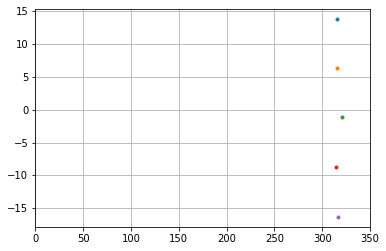

In [17]:
import glob
import matplotlib.pyplot as plt

file = glob.glob('./300cm/txt/*.txt')
print(file[:2])
f = open(file[1],'r')
data_ore = f.read().split('\n')
f.close()
for i in data_ore:
    if not i == '':
        sp = i.split(' ')
        plt.plot(float(sp[0]),float(sp[1]),linestyle='',marker='.')
plt.grid('TRUE')
plt.xlim(0,350)
#plt.ylim(-100,100)


In [15]:
import open3d as o3d
import numpy as np
import random
#world = [[0.0, 0.0, 0.0], [0.0, 0.05, 0.0], [0.0, 0.1, 0.0], [0.05, 0.0, 0.0], [0.05, 0.05, 0.0], [0.05, 0.1, 0.0], [0.1, 0.0, 0.0], [0.1, 0.05, 0.0], [0.1, 0.1, 0.0], [0.0, 0.0, 0.05], [0.0, 0.05, 0.05], [0.0, 0.1, 0.05], [0.05, 0.0, 0.05], [0.05, 0.05, 0.05], [0.05, 0.1, 0.05], [0.1, 0.0, 0.05], [0.1, 0.05, 0.05], [0.1, 0.1, 0.05]]
world = []
for i in range(100):
    world.append([random.randint(0,100),random.randint(0,100),random.randint(0,100)])
    #print(world)
    xyz = np.array(world)
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(xyz)
    o3d.io.write_point_cloud("./ply_files/"+str(i)+".ply", pcd)

In [38]:
import os
import glob

ply_files = glob.glob('./ply_files/*')
x = []
for i in range(len(ply_files)):
    x.append(i+1)
file_size = []
for idx,ply_file in enumerate(files):
    file_size.append(os.path.getsize(ply_file))
    #print(str(idx)+':'+str(os.path.getsize(ply_file)))

./ply_files\0.ply
./ply_files\1.ply
./ply_files\2.ply
./ply_files\3.ply
./ply_files\4.ply
./ply_files\5.ply
./ply_files\6.ply
./ply_files\7.ply
./ply_files\8.ply
./ply_files\9.ply
./ply_files\10.ply
./ply_files\11.ply
./ply_files\12.ply
./ply_files\13.ply
./ply_files\14.ply
./ply_files\15.ply
./ply_files\16.ply
./ply_files\17.ply
./ply_files\18.ply
./ply_files\19.ply
./ply_files\20.ply
./ply_files\21.ply
./ply_files\22.ply
./ply_files\23.ply
./ply_files\24.ply
./ply_files\25.ply


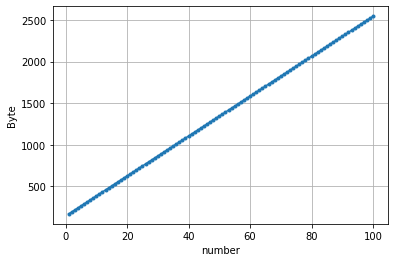

In [40]:
import matplotlib.pyplot as plt
import re
import glob

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

files = sorted(glob.glob('./ply_files/*'), key=natural_keys)

for idx,size in enumerate(files):
    print(files[idx])
    if idx == 25:
        break

plt.plot(x,file_size,marker='.')
plt.grid('TRUE')
plt.ylabel('Byte')
plt.xlabel('number')
plt.savefig('../md_matome/images/size_result.png')

In [8]:
import torch
import glob

def data_sampler(path_1, path_2):
    #path_2 = r'C:\Users\wtana\Desktop\LiDAR_cm\syoumen\kaneko\200cm\txt\*'
    true_files = glob.glob(path_1)
    false_files = glob.glob(path_2)
    
    len_true = len(true_files)
    len_false = len(false_files)
    if len_true == 0 or len_false == 0:
        print('No data available')
        return 0,0

    true_list = []
    false_list = []

    for idx in range(len_true):
        s_num = []
        with open(true_files[idx],'r') as f:
            data = f.read().split('\n')
            for i in range(len(data)-1):
                s = data[i].split(' ')
                s_num.append([float(s[0]),float(s[1]),float(s[2])])
        true_list.append([s_num])

    for idx in range(len_false):
        s_num = []
        print(type(idx))
        print(false_files[idx])
        with open(false_files[idx],'r') as f:
            data = f.read().split('\n')
            for i in range(len(data)-1):
                s = data[i].split(' ')
                s_num.append([float(s[0]),float(s[1]),float(s[2])])
        false_list.append([s_num])
    len_true = len(true_list)
    len_false = len(false_list)

    true_labels = torch.ones(32)
    false_labels = torch.zeros(32)
    
    input_data = torch.cat((torch.Tensor(true_list),torch.Tensor(false_list)))
    labels = torch.cat((torch.Tensor(true_labels), torch.Tensor(false_labels)))
    return input_data.view(-1,3), labels.view(-1, 1)


a,b = data_sampler('./normalize_txt/wall/0.txt','./normalize_txt/takuya/150cm/1.txt')

<class 'int'>
./normalize_txt/takuya/150cm/1.txt


RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 78 but got size 32 for tensor number 1 in the list.

In [1]:
import glob
import random
file_path = './normalize_txt/wall/*'
files = glob.glob(file_path)
for idx,file in enumerate(files):
    f = open(file,'r')
    data = f.read().split('\n')
    f.close()
    f = open(file,'a')
    for _ in range(101 -len(data)):
        num = random.randint(0,len(data)-2)
        f.write(str(data[num])+'\n')
    f.close()